# A1.3 Regresión lineal múltiple

Después de haber trabajado con la regresión lineal simple, es momento de tomar un reto mayor, 
pero a la vez, mucho más adecuado para problemas reales: la regresión lineal múltiple. En esta 
ocasión  practicarás  con  una  base  de  datos  de  la  NASA,  con  la  que  trabajaron  para  tratar  de 
determinar  perfiles  aerodinámicos  ideales  ante  distintas  condiciones,  como:  la  velocidad  del 
viento y ángulo de ataque del mismo. 
 
Utilizaremos el archivo de nombre “A1.3 NASA.csv”, donde podrás encontrar información para 
1,052  observaciones  distintas,  con  6  mediciones  para  cada  una  de  ellas.  Los  datos  se 
descargaron  del  UCI  Machine  Learning  Repository,  y  originalmente  se publicaron  en  el  NASA 
Reference Publication 1218. 
 
La base de datos cuenta con la siguiente información:<br>
 “frecuencia”. Frecuencia, en Hz. <br>
 “angulo”. Ángulo de ataque, en grados. <br>
 “longitud”. Longitud de cuerda geométrica, en metros. <br>
 “velocidad”. Velocidad de flujo libre, en metros por segundo. <br>
 “espesor”. Espesor del desplazamiento en el lado de succión, en metros. <br>
 “presion”. Nivel escalado de presión sonora, en dB.  <br>

Desarrolla  los  siguientes  puntos  en  una Jupyter  Notebook,  tratando,  dentro  de  lo  posible,  que 
cada  punto  se  trabaje  en  una  celda  distinta.  Los  comentarios  en  el  código  siempre  son 
bienvenidos, de preferencia, aprovecha el markdown para generar cuadros de descripción que 
ayuden al lector a comprender el trabajo realizado.

1. Importa los datos del archivo “NASA.csv” a tu ambiente de trabajo. Este archivo lo 
encontrarás en la misma página donde descargaste esta plantilla. Revisa las dimensiones 
del data frame e imprime en consola tanto dichas dimensiones como las primeras 15 filas 
de datos.

In [1]:
import pandas as pd
df = pd.read_csv('A1.3 NASA.csv')
print(df.shape)
print(df.columns)

(1503, 6)
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')


2. Separa el data frame en datos de entrenamiento y datos de prueba con una proporción 
70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el  resto para 
validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica 
simplemente tomar las primeras observaciones para entrenar y las últimas para probar. 
Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate 
que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de 
datos original.

In [3]:
train = df.sample(frac=0.7)
test = df.drop(train.index)

print("Train:", train.shape)
print("Test:", test.shape)

Train: (1052, 6)
Test: (451, 6)


3. Entrena  un  modelo  de  regresión  lineal  múltiple,  para  que  las  primeras  5  variables  del 
sistema intenten predecir a la sexta, “presion”. Es decir, nos interesa tratar de predecir 
el  aerodinamismo,  medido  como  la  presión  sonora  detectada.  Imprime  en  pantalla  un 
resumen  del  modelo,  donde  se  muestre  claramente  el  coeficiente  estimado  de  cada 
variable, así como su p-value asociado, entre otras cosas. Es probable que los p-values 
se vean como 0.000, en ese caso, imprimir manualmente los valores exactos de dichas 
métricas (recuerda el atributo `pvalues`).

In [6]:
import statsmodels.api as sm

X = train.drop('presion', axis=1)
Y = train['presion']

model = sm.OLS(Y, sm.add_constant(X))

results = model.fit()

print(results.summary())

print("Valor p frecuencia:", results.pvalues['frecuencia'])
print("Valor p angulo:", results.pvalues['angulo'])
print("Valor p longitud:", results.pvalues['longitud'])
print("Valor p velocidad:", results.pvalues['velocidad'])
print("Valor p espesor:", results.pvalues['espesor'])


                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          3.62e-166
Time:                        19:58:54   Log-Likelihood:                -3135.7
No. Observations:                1052   AIC:                             6283.
Df Residuals:                    1046   BIC:                             6313.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.6566      0.651    203.765      0.0

4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos 
una  variable  significativa  en  el  modelo.  Adicionalmente,  indica  específicamente  cuál  o 
cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál 
considerarías  que  es  la variable  más  importante  del  modelo.  Imprime  en consola  cada 
una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás 
basando para llegar a cada conclusión.

In [9]:
print("Todas las variables tienen un valor de p menor a 0.05 por lo que se considera que son significativas.")
print("La longitud y el espesor son las variables más significativas ya que sus coeficientes son los más grandes.")

Todas las variables tienen un valor de p menor a 0.05 por lo que se considera que son significativas.
La longitud y el espesor son las variables más significativas ya que sus coeficientes son los más grandes.


5. Calcula el residual standard error y la 𝑅2 del modelo, tanto para los datos de 
entrenamiento como para los datos de validación e imprime dichos valores en la consola. 
Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar los 
atributos ‘scale’ (y sacar la raíz cuadrada) y ‘rsquared’.

In [7]:
import numpy as np

# Residual Standard Error (RSE) y R2 para el conjunto de entrenamiento
rse_train = np.sqrt(results.scale)
r2_train = results.rsquared

# Predicciones para el conjunto de prueba
X_test = test.drop('presion', axis=1)
y_test = test['presion']
y_pred_test = results.predict(sm.add_constant(X_test))

# RSE para el conjunto de prueba
rse_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2))

# R2 para el conjunto de prueba
ss_res = np.sum((y_test - y_pred_test) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res / ss_tot)

print(f"Entrenamiento - RSE: {rse_train:.4f}, R2: {r2_train:.4f}")
print(f"Validación - RSE: {rse_test:.4f}, R2: {r2_test:.4f}")

Entrenamiento - RSE: 4.7807, R2: 0.5248
Validación - RSE: 4.8806, R2: 0.4923


6. Finalmente,  tratemos  de  visualizar  los  resultados  obtenidos.  Genera  una  gráfica  de 
dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos 
de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo, 
para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se 
tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor 
estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro 
modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los 
resultados obtenidos.

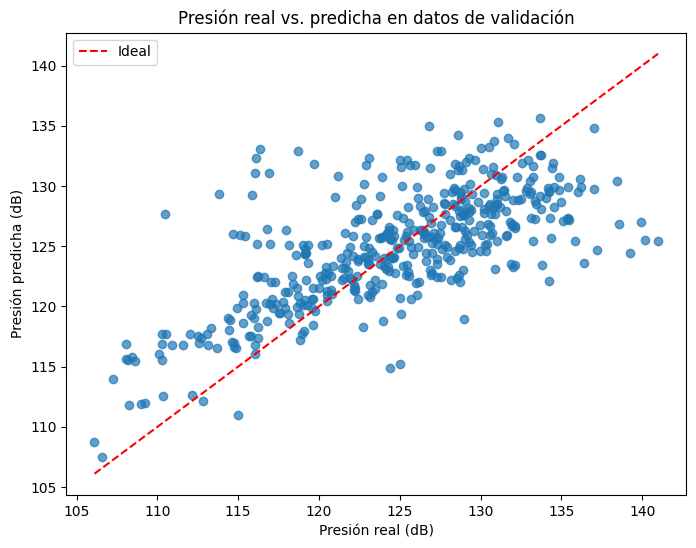

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Presión real (dB)')
plt.ylabel('Presión predicha (dB)')
plt.title('Presión real vs. predicha en datos de validación')
plt.legend()
plt.show()